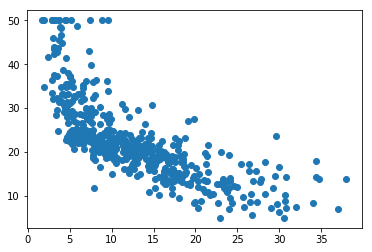

In [32]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

boston = load_boston()

X=pd.DataFrame(boston.data[:,:], columns=boston.feature_names)
y=pd.DataFrame(boston.target[:])

x = X['LSTAT'].values
plt.scatter(X['LSTAT'],y) #同じ

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

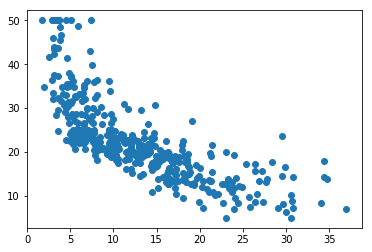

In [12]:
plt.scatter(X_train['LSTAT'],y_train)

In [14]:
lin_1d = LinearRegression()

In [16]:
x_train = X_train.loc[:, ['LSTAT']].as_matrix()
lin_1d.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
lin_1d.predict(35)

array([[ 1.28812629]])

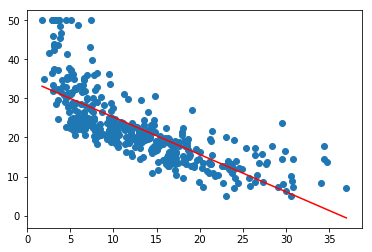

In [24]:
n = np.linspace(np.min(x_train),np.max(x_train), 1000)
y_1d_fit=lin_1d.predict(n[:,np.newaxis])

plt.scatter(x_train,y_train,label='data')
plt.plot(n,y_1d_fit,'r',label='1d_lin')

In [29]:
x_test = X_test.loc[:, ['LSTAT']].as_matrix()
mean_squared_error(y_test, lin_1d.predict(x_test))

46.336305360025925

In [43]:
print(lin_1d.score(x_test, y_test))

0.430956728462


# 次数をあげる

In [41]:
degree_2=PolynomialFeatures(degree=2)
x_train_2d=degree_2.fit_transform(x_train)
lin_2d = LinearRegression()
lin_2d.fit(x_train_2d,y_train)
# test data
x_test = X_test.loc[:, ['LSTAT']].as_matrix()
x_test_2d = degree_2.fit_transform(x_test)

In [42]:
mean_squared_error(y_test,lin_2d.predict(x_test_2d))

38.846868661707191

In [44]:
print(lin_2d.score(x_test_2d, y_test))

0.522932416374


In [64]:
from itertools import chain, combinations
dim=[3,4]
i = set(list(X.columns))

for di in dim:

    degree_=PolynomialFeatures(degree=di)

    for p in chain.from_iterable(combinations(i, r) for r in range(len(i)+1)):
        if len(p) == 0:
            continue
        else:
            x_train = X_train.loc[:, p].as_matrix()
            x_train_d = degree_.fit_transform(x_train)

            lin_ = LinearRegression(normalize=True)
            #normalize=Trueは入力データを正規化してトレーニングすることを意味します。    
            lin_.fit(x_train_d,y_train)

            x_test = X_test.loc[:, p].as_matrix()
            x_test_d = degree_.fit_transform(x_test)

            score_d = lin_.score(x_test_d, y_test)

            if score_d >= 0.75:
                print('d:{0} s:{1} p:{2}'.format(di,score_d, p))

d:3 s:0.7535202032485402 p:('NOX', 'CHAS', 'RAD', 'LSTAT', 'RM')
d:3 s:0.7685431811200337 p:('DIS', 'RAD', 'TAX', 'LSTAT', 'B', 'RM')
d:3 s:0.7645902503358181 p:('DIS', 'RAD', 'TAX', 'ZN', 'LSTAT', 'B', 'RM')
d:3 s:0.7670668028826907 p:('DIS', 'TAX', 'LSTAT', 'PTRATIO', 'B', 'RM', 'INDUS')


In [45]:
y_plot=[]
dim=[3,4,5,10,20]

# x: LSTAT
# y: df, all values extracted
for i in dim:
    degree_=PolynomialFeatures(degree=i)
    x_=degree_.fit_transform(x[:,None])
    lin_ = LinearRegression(normalize=True)
    #normalize=Trueは入力データを正規化してトレーニングすることを意味します。    
    lin_.fit(x_,y)
    #グラフのプロット用のデータをリストに格納しておきます
    n = np.linspace(np.min(x),np.max(x), 1000)
    y_=lin_.predict(degree_.fit_transform(n[:,np.newaxis]))
    y_plot.append(y_)

[]

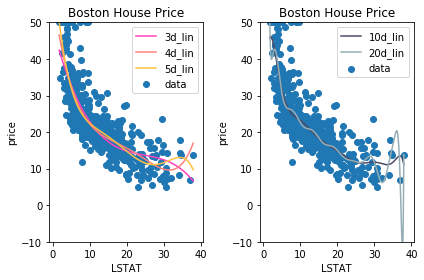

In [47]:
from matplotlib import cm

j=1
plt.subplot(1,2,1)
for i,y__ in zip(dim[:3],y_plot[:3]):
    c = cm.spring(float(j) / 4)
    plt.plot(n,y__,color=c,label=str(i)+'d_lin')
    j+=1  
plt.ylim(-10,50)
plt.xlabel("LSTAT")
plt.ylabel("price")
plt.title("Boston House Price")
plt.scatter(x,y,label='data')
plt.legend()

j=1
plt.subplot(1,2,2)
for i,y__ in zip(dim[3:],y_plot[3:]):
    c = cm.bone(float(j) / 3)
    plt.plot(n,y__,color=c,label=str(i)+'d_lin')
    j+=1  
plt.ylim(-10,50)
plt.xlabel("LSTAT")
plt.ylabel("price")
plt.title("Boston House Price")
plt.scatter(x,y,label='data')

plt.tight_layout()
plt.legend()
plt.plot()